In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
%matplotlib inline

In [37]:
if True:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from xgboost import XGBClassifier
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.svm import LinearSVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import SGDClassifier

In [31]:
# from CPMP's kernel https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    try:
        gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

In [2]:
data = pd.read_csv('./data/select_train_data10.csv')

In [14]:
def calculate_conditional_probas_ofClass1(feature_vector, target):
    '''
    Calculate conditional probability of being in class1 for
    each value of the feature, and replace the feature_vector
    with a new one whose values are now those conditional
    probabilities.
    
    feature_vector and the target must be pd.Series of the 
    same length.
    '''
    unique_values = feature_vector.unique()
    cond_probas = {}
    for val in unique_values:
        data_val = feature_vector[feature_vector == val]
        if len(data_val) != 0:
            data_val_class1 = feature_vector[(feature_vector == val) & (target == 1)]
            cond_proba_for_val = len(data_val_class1)/len(data_val)
        else:
            cond_proba_for_val = 0
        cond_probas[val] = cond_proba_for_val
    
    feature_class1_prob_vector = feature_vector.replace(cond_probas)
    
    return feature_class1_prob_vector

In [15]:
# Testing the function above
calculate_conditional_probas_ofClass1(data.iloc[:, 0], data.iloc[:, -1]).unique()

array([ 0.03640407,  0.03664173,  0.03669928,  0.03600913,  0.03619377,
        0.03875763,  0.05376344])

In [19]:
data2 = pd.DataFrame()
for col in data.iloc[:, :-1].columns:
    data2[col] = calculate_conditional_probas_ofClass1(data[col], data.iloc[:, -1])
data2['target'] = data.target

In [20]:
for col in data2.columns:
    print('%s probas: ' % col, '\n', data2[col].unique())

ps_calc_05 probas:  
 [ 0.03640407  0.03664173  0.03669928  0.03600913  0.03619377  0.03875763
  0.05376344]
ps_calc_07 probas:  
 [ 0.03728232  0.0353456   0.03596365  0.03638363  0.03684888  0.03803362
  0.03629823  0.04108651  0.03107861  0.08695652]
ps_calc_13 probas:  
 [ 0.03667522  0.03629178  0.03526311  0.03676125  0.03734625  0.03636377
  0.03578212  0.03631562  0.03812468  0.03133903  0.03448276  0.02272727
  0.05        0.25      ]
ps_calc_14 probas:  
 [ 0.03571559  0.03699972  0.03612428  0.03447974  0.03619666  0.03691113
  0.03726436  0.03712402  0.03601277  0.03908278  0.03733602  0.03563234
  0.04141657  0.03600984  0.03377815  0.03761312  0.03537415  0.03870968
  0.0610687   0.0212766   0.0295082   0.        ]
ps_car_12 probas:  
 [ 0.0399078   0.03135479  0.06467122  0.05244355  0.0621205   0.05263158
  0.04761905  0.13043478  0.        ]
ps_car_13 probas:  
 [ 0.04084916  0.02633819  0.03060751  0.0230501   0.03856647  0.03314826
  0.06578947  0.04691539  0.0725677

/home/ryohayama/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


======== LogisticRegression ========
Gini = 0.2314
             precision    recall  f1-score   support

          0     0.9635    1.0000    0.9814     57352
          1     0.0000    0.0000    0.0000      2170

avg / total     0.9284    0.9635    0.9457     59522



/home/ryohayama/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


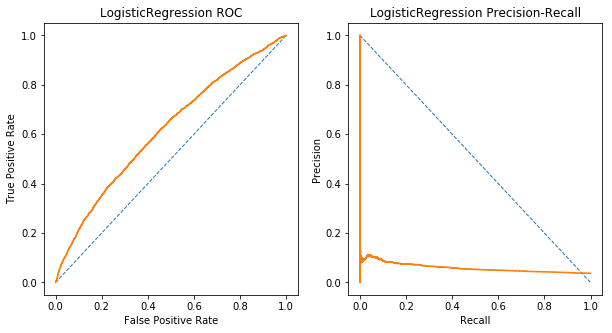

/home/ryohayama/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


======== RandomForestClassifier ========
Gini = 0.2273
             precision    recall  f1-score   support

          0     0.9635    1.0000    0.9814     57352
          1     0.0000    0.0000    0.0000      2170

avg / total     0.9284    0.9635    0.9457     59522



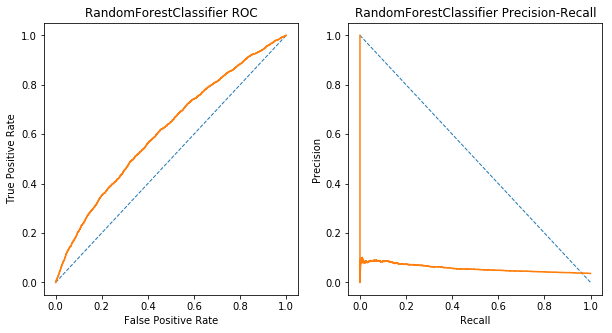

======== XGBClassifier ========
Gini = 0.2285
             precision    recall  f1-score   support

          0     0.9635    1.0000    0.9814     57352
          1     0.0000    0.0000    0.0000      2170

avg / total     0.9284    0.9635    0.9456     59522



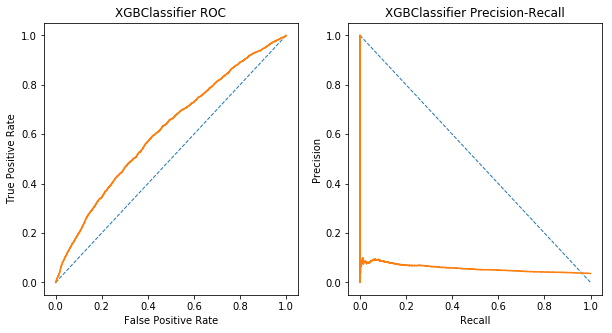

======== LinearDiscriminantAnalysis ========
Gini = 0.2311
             precision    recall  f1-score   support

          0     0.9636    0.9999    0.9814     57352
          1     0.2500    0.0005    0.0009      2170

avg / total     0.9375    0.9635    0.9457     59522



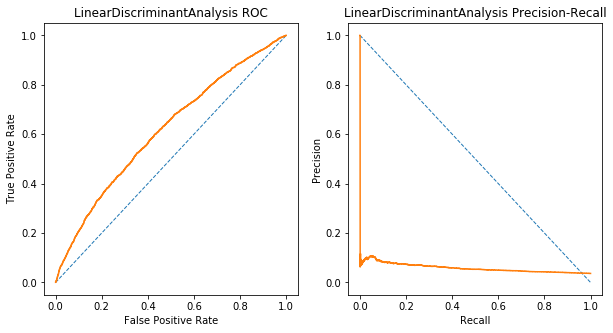

/home/ryohayama/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


======== SGDClassifier ========
Gini = 0.2256
             precision    recall  f1-score   support

          0     0.9635    1.0000    0.9814     57352
          1     0.0000    0.0000    0.0000      2170

avg / total     0.9284    0.9635    0.9457     59522



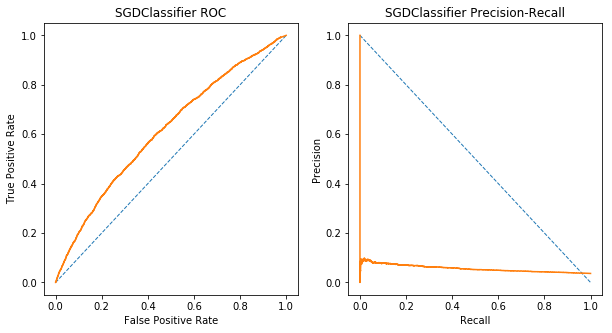

CPU times: user 4min 13s, sys: 4.07 s, total: 4min 17s
Wall time: 38.6 s


In [39]:
%%time
X = np.array(data2.iloc[:, :-1])
y = np.array(data2.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clfs = [LogisticRegression(C=100), 
        RandomForestClassifier(max_depth=10, n_estimators=100, n_jobs=8),
        XGBClassifier(max_depth=7, n_estimators=100, n_jobs=8), 
        LinearDiscriminantAnalysis(),
        SGDClassifier(loss='modified_huber')]
clf_labels = ['LogisticRegression', 
              'RandomForestClassifier',
              'XGBClassifier',
              'LinearDiscriminantAnalysis', 'SGDClassifier']

for i, clf in enumerate(clfs):
    label = clf_labels[i]
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    report = classification_report(y_test, y_pred, digits=4,
                                       labels=None, target_names=None)
    gini_score = eval_gini(y_test, y_proba[:, 1])
    print('======== %s ========' % label)
    print('Gini = %.4f' % gini_score)
    print(report)

    precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1], pos_label=1)
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    neutral_line = np.linspace(0, 1, 20)
    ax1.plot(neutral_line, neutral_line, lw=1, ls='--')
    ax1.plot(fpr, tpr)
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('%s ROC' % label)
    ax2.plot(neutral_line, 1- neutral_line, lw=1, ls='--')
    ax2.plot(recall, precision)
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('%s Precision-Recall' % label)
    plt.show()